# Genre Count

+ Animation: 42
+ Children: 122
+ Comedy: 505
+ Action: 251
+ Adventure: 135
+ Thriller: 251
+ Drama: 725
+ Crime: 109
+ Sci-Fi: 101
+ War: 71
+ Romance: 247
+ Horror: 92
+ Musical: 56
+ Documentary: 50
+ Fantasy: 22
+ Film-Noir: 24
+ Mystery: 61

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats

def plt_chart(x, y, title, x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

def get_corr(x, y):
    # (correlation, p-value)
    pearson = scipy.stats.pearsonr(x, y)
    # SpearmanrResult(correlation, pvalue)
    spearman = scipy.stats.spearmanr(x, y)
    # KendalltauResult(correlation, pvalue)
    kendall = scipy.stats.kendalltau(x, y)
    print(f'Pearson:\n\tcorr: {round(pearson[0], 3)}\n\tp-value: {round(pearson[0], 3)}\n')
    print(f'Spearman:\n\tcorr: {round(spearman.correlation, 3)}\n\tp-value: {round(spearman.pvalue, 3)}\n')
    print(f'Kendall:\n\tcorr: {round(kendall.correlation, 3)}\n\tp-value: {round(kendall.pvalue, 3)}\n')
    

Pearson:
	corr: 0.032
	p-value: 0.032

Spearman:
	corr: 0.024
	p-value: 0.47

Kendall:
	corr: 0.015
	p-value: 0.48



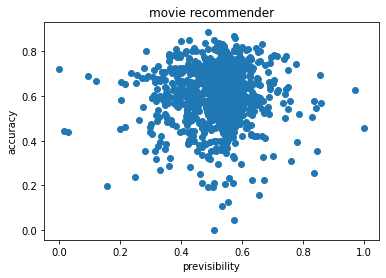

In [4]:
import csv

data_path = "/Users/hugo/Documents/recomendadores/data/digested/ml-100k/"

user_acc = {}
user_pred = {}
pred = []
acc = []
with open(data_path + "usr_vs_normalized_pred.csv") as user_pred_file:
    for row in csv.reader(user_pred_file, delimiter='\t'):
#         print(row)
        user_pred[int(row[0])] = float(row[1])
with open(data_path + "usr_vs_user_acc.csv") as user_acc_file:
    for row in csv.reader(user_acc_file, delimiter='\t'):
        user_acc[int(row[0])] = float(row[1])

for uid in range(1, 944):
    pred.append(user_pred[uid])
    acc.append(user_acc[uid])
    
plt_chart(x=pred, y=acc, title="movie recommender", x_label="previsibility", y_label="accuracy")
get_corr(x=pred, y=acc)

Pearson:
	corr: 0.103
	p-value: 0.103

Spearman:
	corr: 0.092
	p-value: 0.005

Kendall:
	corr: 0.062
	p-value: 0.005



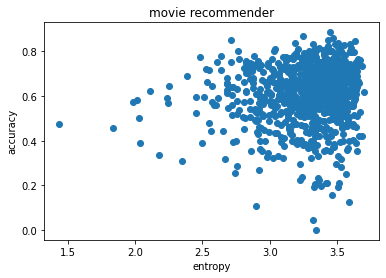

In [6]:
import csv

data_path = "/Users/hugo/Documents/recomendadores/data/digested/ml-100k/"

user_acc = {}
user_pred = {}
pred = []
acc = []
with open(data_path + "user_vs_user_entropy.csv") as user_pred_file:
    for row in csv.reader(user_pred_file, delimiter='\t'):
#         print(row)
        user_pred[int(row[0])] = float(row[1])
with open(data_path + "usr_vs_user_acc.csv") as user_acc_file:
    for row in csv.reader(user_acc_file, delimiter='\t'):
        user_acc[int(row[0])] = float(row[1])

for uid in range(1, 944):
    pred.append(user_pred[uid])
    acc.append(user_acc[uid])
    
plt_chart(x=pred, y=acc, title="movie recommender", x_label="entropy", y_label="accuracy")
get_corr(x=pred, y=acc)